### Описание проекта:

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

### Знакомство с данными: 

In [10]:
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

##### Гипотезы

In [11]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis['Hypothesis'] = hypothesis['Hypothesis'].astype('str')
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


##### ICE


In [12]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


8 => 0 => 7

##### RICE

In [13]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


7 => 2 => 0. Понятно, что на результат повлиял новый параметр Reach. Это дало нам понять, что первой стоит проверить 7 гипотезу, а не 8. У обеих высокие показатели Impact и Confidence, но Reach у 7 гипотезы в 10 раз больше.



### Анализ A/B-теста:

In [14]:
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [15]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [16]:
dategroups = orders[['date', 'group']].drop_duplicates()

orders_agg = dategroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitors_agg = dategroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


cummulativeData = orders_agg.merge(visitors_agg, left_on = ['date', 'group'], right_on = ['date', 'group'])
cummulativeData = cummulativeData.rename(columns={'transactionId': 'orders', 'visitorId': 'buyers'})
cummulativeData['date'] = clearCummulativeData['date'].astype('datetime64')
cummulativeData['day'] = clearCummulativeData['date'].dt.day
orders_agg

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


##### График кумулятивной выручки по группам 

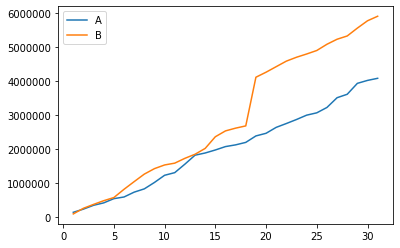

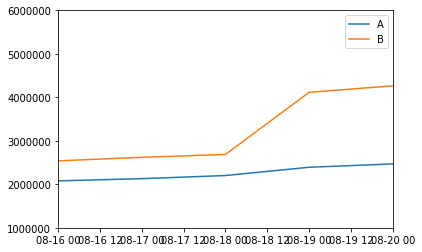

In [17]:
cumulativeRevA = cummulativeData.query('group == "A"')[['date', 'revenue', 'orders', 'day']]
cumulativeRevB = cummulativeData.query('group == "B"')[['date', 'revenue', 'orders', 'day']]
cumulativeRevMerged = cumulativeRevA.merge(cumulativeRevB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B']) 

plt1 = plt.figure()
plt2 = plt.figure()
ax1 = plt1.add_subplot()
ax2 = plt2.add_subplot()
                     
ax1.plot(cumulativeRevA['day'], cumulativeRevA['revenue'], label = 'A')
ax1.plot(cumulativeRevB['day'], cumulativeRevB['revenue'], label = 'B')
ax1.legend()

ax2.plot(cumulativeRevA['date'], cumulativeRevA['revenue'], label = 'A')
ax2.plot(cumulativeRevB['date'], cumulativeRevB['revenue'], label = 'B')
ax2.axis(['2019-08-16', '2019-08-20', 1000000, 6000000])
ax2.legend()


На графике четко виден резкий скачок выручки где-то в середине месяца. Выведем приближенную версию графика и точно узнаем, когда произошел скачок. 



##### График кумулятивного среднего чека по группам

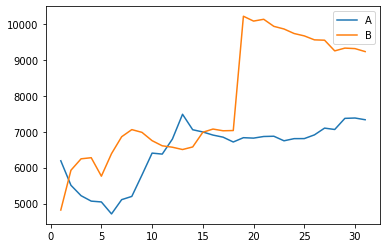

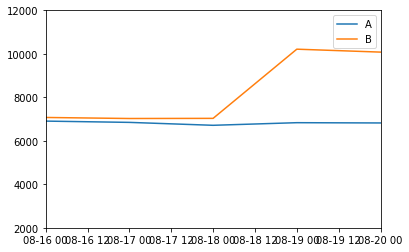

In [18]:
plt1 = plt.figure()
plt2 = plt.figure()
ax1 = plt1.add_subplot()
ax2 = plt2.add_subplot()
                     
ax1.plot(cumulativeRevA['day'], cumulativeRevA['revenue'] / cumulativeRevA['orders'], label = 'A')
ax1.plot(cumulativeRevB['day'], cumulativeRevB['revenue'] / cumulativeRevB['orders'], label = 'B')
ax1.legend()

ax2.plot(cumulativeRevA['date'], cumulativeRevA['revenue'] / cumulativeRevA['orders'], label = 'A')
ax2.plot(cumulativeRevB['date'], cumulativeRevB['revenue'] / cumulativeRevB['orders'], label = 'B')
plt.axis(['2019-08-16', '2019-08-20', 2000, 12000])
ax2.legend()

Ожидаемо такая же картина на графиках среднего чека. 19 числа кто-то потратил очень много денег.



##### График относительного изменения кумулятивного среднего чека группы B к группе A

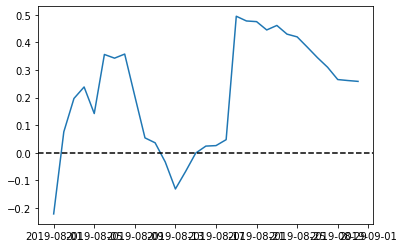

In [19]:
plt.plot(cumulativeRevMerged['date'], (cumulativeRevMerged['revenueB'] / cumulativeRevMerged['ordersB']) / (cumulativeRevMerged['revenueA'] / cumulativeRevMerged['ordersA']) - 1)
plt.axhline(y = 0, color='black', linestyle='--')

Хоть согласно графику средний чек B почти всегда был больше A, но движение графика шло резкими скачками, и таким данным вряд ли можно верить на 100%. Ну и конечно остался скачок 19 числа.



#####  График кумулятивной конверсии по группам

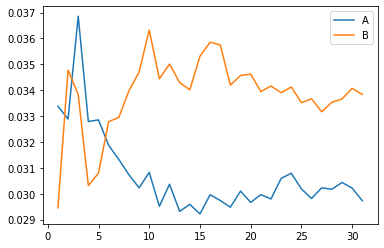

In [20]:
cummulativeData['conversion'] = cummulativeData['orders'] / cummulativeData['visitors'] 
cummulativeDataA = cummulativeData.query('group == "A"')
cummulativeDataB = cummulativeData.query('group == "B"')

plt.plot(cummulativeDataA['day'], cummulativeDataA['conversion'], label = 'A')
plt.plot(cummulativeDataB['day'], cummulativeDataB['conversion'], label = 'B')
plt.legend()


В этом случае с течением эксперимента колебания немного уменьшились. Почти все время конверсия группы B была выше примерно на 10%

##### График относительного изменения кумулятивной конверсии группы B к группе A

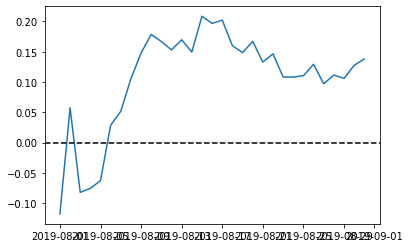

In [21]:
mergedCummulativeConv = cummulativeDataA.merge(cummulativeDataB, left_on = 'date', right_on = 'date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCummulativeConv['date'], mergedCummulativeConv['conversionB'] / mergedCummulativeConv['conversionA'] - 1)
plt.axhline(y = 0, color = 'black', linestyle = '--')

Логично, если конверсия группы B на предыдущем графике была выше почти все время, от и смежный график почти всегда будет выше нуля.



##### Точечный график количества заказов по пользователям

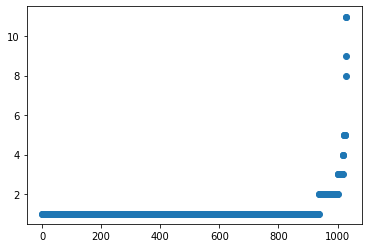

In [22]:
ordersByUsers = orders.groupby('visitorId')['transactionId'].nunique().sort_values()
xax = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(xax, ordersByUsers)

Пользователи с количеством заказом больше одного практически отсутствуют. 

##### 90, 95-й и 99-й перцентили количества заказов на пользователя

In [23]:
np.percentile(ordersByUsers, [90, 95, 99])

array([1., 2., 4.])

Брать пользователей с количеством заказов более двух вряд ли будет иметь смысл. Это около 5% пользователей

##### Точечный график стоимостей заказов

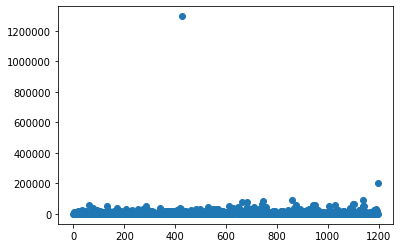

In [24]:
cummulativeData
xax = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(xax, orders['revenue'])

Тут видно только то, что большинство заказов намного меньше 200 000, но лучше дополнитльно построим гистограмму

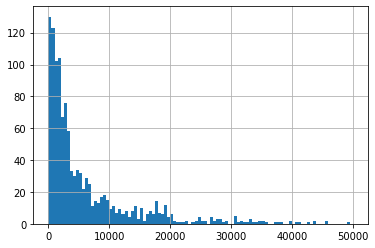

In [25]:
orders['revenue'].hist(bins = 100, range = (0, 50000))

Теперь хорошо видно, что большинство заказов даже меньше 10 тысяч.  

##### 95-й и 99-й перцентили стоимости заказов

In [26]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Перцентили все только подтверждают. Отсеиваем заказы больше 95 перцентиля.



##### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [27]:
sampleA = cummulativeData.query('group == "A"')['conversion']
sampleB = cummulativeData.query('group == "B"')['conversion']

print('Pvalue:', st.mannwhitneyu(sampleA, sampleB)[1])
print('Отношение конверсий:', sampleB.mean() / sampleA.mean() - 1)

Pvalue: 1.2368310681408489e-08
Отношение конверсий: 0.10178468497368898


Огромный Pvalue ==> нет статистически значимого различия между группами. Конверсия группы B на 10% выше

##### Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [28]:
print('P-value:', st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1])
print('Разница в среднем чеке:','{0:.3}'.format(orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean() - 1))

P-value: 0.3646454927716229
Разница в среднем чеке: 0.259


Pvalue тоже большой, а различие между чеками ещё больше, целых 26% в пользу группы B.

##### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [29]:
# Оставим только чистые данные при помощи срезов
clearOrders_agg = dategroups.apply(lambda x: orders.query('revenue <= 28000')[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
clearCummulativeData = clearOrders_agg.merge(visitors_agg, left_on = ['date', 'group'], right_on = ['date', 'group'])
clearCummulativeData = clearCummulativeData.rename(columns={'transactionId': 'orders', 'visitorId': 'buyers'})
clearCummulativeData['conversion'] = clearCummulativeData['orders'] / clearCummulativeData['visitors']
clearCummulativeData['date'] = clearCummulativeData['date'].astype('datetime64')
clearCummulativeData['day'] = clearCummulativeData['date'].dt.day

sampleA = clearCummulativeData.query('group == "A"')['conversion']
sampleB = clearCummulativeData.query('group == "B"')['conversion']

print('Pvalue:', st.mannwhitneyu(sampleA, sampleB)[1])
print('Отношение конверсий:', sampleB.mean() / sampleA.mean() - 1)
clearCummulativeData

Pvalue: 1.4534127917523559e-08
Отношение конверсий: 0.0881298943043638


,date,group,orders,buyers,revenue,visitors,conversion,day
0,2019-08-01,A,22,18,90590,719,0.030598,1
1,2019-08-01,B,21,20,101217,713,0.029453,1
2,2019-08-02,A,42,36,184412,1338,0.031390,2
3,2019-08-02,B,43,41,197939,1294,0.033230,2
4,2019-08-03,A,66,60,296885,1845,0.035772,3
...,...,...,...,...,...,...,...,...
57,2019-08-29,B,565,518,2874329,17708,0.031906,29
58,2019-08-30,A,519,469,2706383,18037,0.028774,30
59,2019-08-30,B,586,538,2974842,18198,0.032201,30
60,2019-08-31,A,531,479,2768216,18736,0.028341,31


Можно сказать, что после очистки данных ничего не изменилось. Только отношение конверсий понизилось на 20% после очистки данных.

##### Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [30]:
print('P-value:', st.mannwhitneyu(orders.query('group == "A" and revenue <= 28000')['revenue'], orders.query('group == "B" and revenue <= 28000')['revenue'])[1])
print('Разница в среднем чеке:','{0:.3}'.format(orders.query('group == "B" and revenue <= 28000')['revenue'].mean() / orders.query('group == "A" and revenue <= 28000')['revenue'].mean() - 1))

P-value: 0.4259370929702875
Разница в среднем чеке: -0.0162


Гипотеза все ещё не отвергается, однако разница в чеке снизилась почти на 30%



### Итог:

Ни по конверсии, ни по среднему чеку нет статистически значимого различия. Согласно очищенным данным конверсия группы B выше на 8%, однако средний чек оказался ниже на полтора. Взглянем на пару графиков после очистки данных:

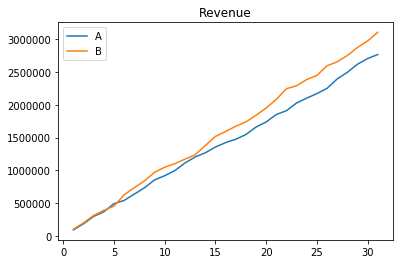

In [31]:
clearCummulativeDataA = clearCummulativeData.query('group == "A"')
clearCummulativeDataB = clearCummulativeData.query('group == "B"')

plt.plot(clearCummulativeDataA['day'], clearCummulativeDataA['revenue'], label = 'A')
plt.plot(clearCummulativeDataB['day'], clearCummulativeDataB['revenue'], label = 'B')
plt.title('Revenue')
plt.legend()

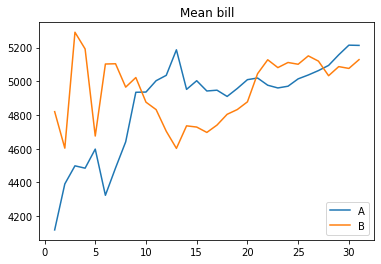

In [32]:
plt.plot(clearCummulativeDataA['day'], clearCummulativeDataA['revenue'] / clearCummulativeDataA['orders'], label = 'A')
plt.plot(clearCummulativeDataB['day'], clearCummulativeDataB['revenue'] / clearCummulativeDataB['orders'], label = 'B')
plt.title('Mean bill')
plt.legend()

Text(0.5, 1.0, 'Conversion')

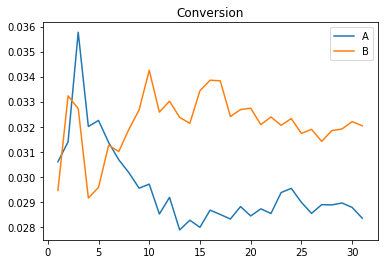

In [33]:
plt.plot(clearCummulativeDataA['day'], clearCummulativeDataA['conversion'], label = 'A')
plt.plot(clearCummulativeDataB['day'], clearCummulativeDataB['conversion'], label = 'B')
plt.legend()
plt.title('Conversion')


### Вывод

Хоть график среднего чека особо ничего не говорит в пользу какой-либо группы, график выручки группы B без выбросов стабильно находился выше графика группы A. Тоже самое можно сказать о графиках конверсий. К тому же статистическая проверка показала повышение конверсии на 8%. Поэтому эксперимент стоит закончить и признать его успешным.    

